# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Amir Mohammad Yaghoobian zadeh
2.   Student Number: 401300525


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
from google.colab import drive
drive.mount('/content/gdrive')

plays = pd.read_csv('gdrive/MyDrive/Deep learning/HW1/data/user_artists.dat', sep='\t')
artists = pd.read_csv('gdrive/MyDrive/Deep learning/HW1/data/artists.dat', sep='\t', usecols=['id','name'])

Mounted at /content/gdrive


# Preprocessing (20 pts)

In [4]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

temp = plays.sort_values(by=['artistID','userID']).reset_index(drop=True)
_, rep = np.unique(temp['artistID'], return_counts=True)
temp3 = artists.iloc[artists.index.repeat(rep)].reset_index(drop=True)
ap = pd.concat([temp3,temp],axis=1)

display(ap)


,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [ ]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop(['id'], axis=1)
ap = ap.reset_index(drop=True)
display(ap)

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [7]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank_bs = pd.DataFrame() #before sorting
artist_rank_bs['name'] = ap['name'].unique()
artist_rank_bs['totalUniqueUsers'] = rep

temp = ap['playCount'].cumsum()[rep.cumsum()-1].reset_index(drop=True)
temp2 = temp.diff()
temp2[0] = temp[0]
artist_rank_bs['totalArtistPlays'] = np.asarray(temp2, dtype=np.int64)

artist_rank_bs['avgUserPlays'] = artist_rank_bs['totalArtistPlays'] / artist_rank_bs['totalUniqueUsers']
artist_rank = artist_rank_bs.sort_values(by=['totalArtistPlays'], ascending=False)

rep_new = rep[artist_rank.index]
# print(artist_rank.index)
# print(rep_new)
artist_rank = artist_rank.reset_index(drop=True)
display(artist_rank)

,name,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Britney Spears,522,2393140,4584.559387
1,Depeche Mode,282,1301308,4614.567376
2,Lady Gaga,611,1291387,2113.563011
3,Christina Aguilera,407,1058405,2600.503686
4,Paramore,399,963449,2414.659148
...,...,...,...,...
17627,K-Precise,1,1,1.000000
17628,ZÜNDER,1,1,1.000000
17629,Evil Masquerade,1,1,1.000000
17630,Gosling,1,1,1.000000


In [ ]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [8]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

from itertools import chain

temp = [[i]*j for i,j in enumerate(rep)]
# temp = sum(temp,[])
temp = list(chain(*temp))
temp = artist_rank_bs.iloc[temp].drop(['name'], axis=1).reset_index(drop=True)

ap2 = pd.DataFrame()
ap2['id'] = ap['userID']
ap2 = pd.concat([ap2,ap,temp],axis=1)

ap = ap2.sort_values(by=['playCount'], ascending=False)
# display(ap)
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,1642,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,2071,Thalía,2071,792,324663,26,350035,13462.884615
27302,1094,U2,1094,511,320725,185,493024,2664.994595
8152,1905,Blur,1905,203,257978,114,318221,2791.412281
26670,1664,Paramore,1664,498,227829,399,963449,2414.659148
21191,1146,Evanescence,1146,378,203165,226,513476,2272.017699
14165,514,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,1983,Shakira,1983,701,172496,319,688529,2158.398119
33127,757,Shakira,757,701,169596,319,688529,2158.398119
31835,1086,Glee Cast,1086,679,165902,249,506453,2033.947791


In [ ]:
ap.head(20)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,792,Thalía,2071,792,324663,26,350035,13462.884615
27302,511,U2,1094,511,320725,185,493024,2664.994595
8152,203,Blur,1905,203,257978,114,318221,2791.412281
26670,498,Paramore,1664,498,227829,399,963449,2414.659148
21191,378,Evanescence,1146,378,203165,226,513476,2272.017699
14165,292,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,701,Shakira,1983,701,172496,319,688529,2158.398119
33127,701,Shakira,757,701,169596,319,688529,2158.398119
31835,679,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [9]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


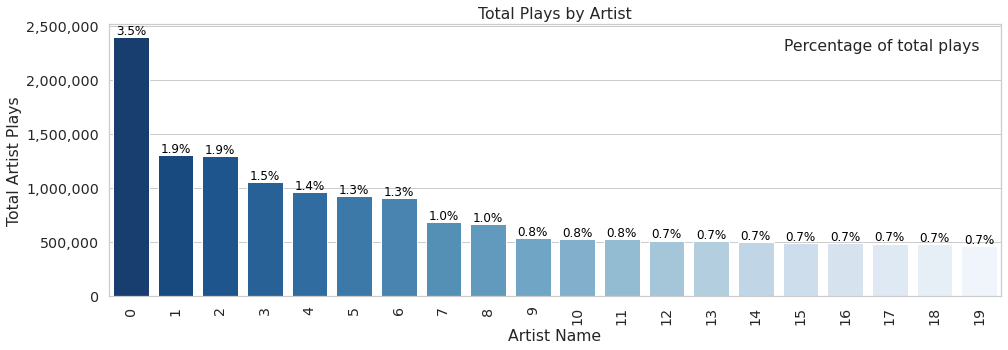

In [10]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


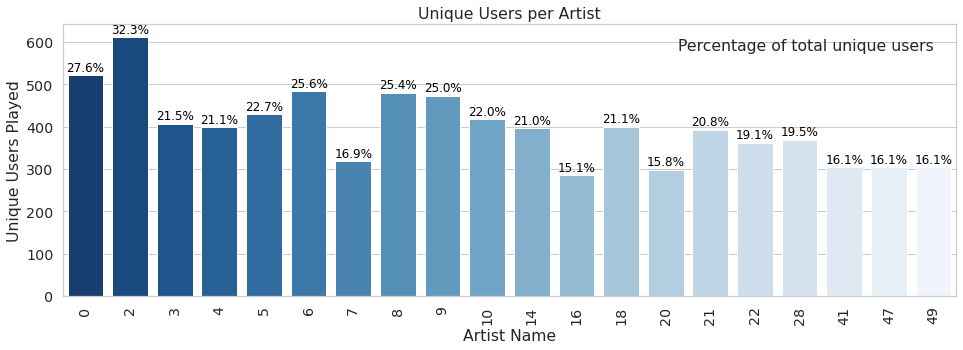

In [11]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


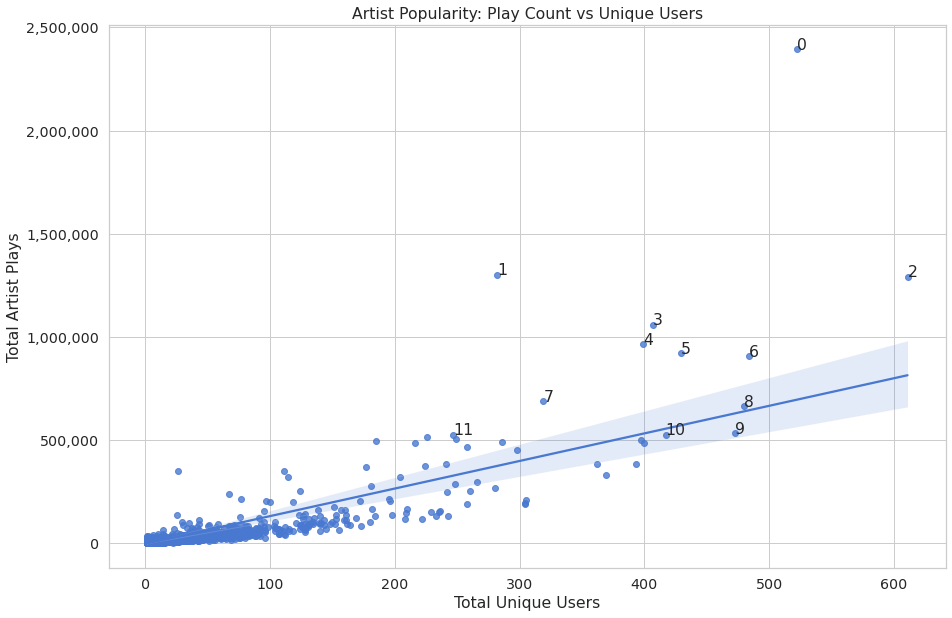

In [12]:
top_artists = artist_rank.index[0:12] # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
# artist_rank is sorted by "totalArtistPlays"

x = artist_rank['totalUniqueUsers'] # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank['totalArtistPlays'] # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [13]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [14]:
display(ap)

,id,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
2800,1642,Depeche Mode,1642,72,352698,282,1301308,4614.567376,1.000000
35843,2071,Thalía,2071,792,324663,26,350035,13462.884615,0.920513
27302,1094,U2,1094,511,320725,185,493024,2664.994595,0.909347
8152,1905,Blur,1905,203,257978,114,318221,2791.412281,0.731441
26670,1664,Paramore,1664,498,227829,399,963449,2414.659148,0.645960
...,...,...,...,...,...,...,...,...,...
38688,1810,Destiny's Child,1810,913,1,83,34746,418.626506,0.000000
32955,1290,Sia,1290,697,1,56,27597,492.803571,0.000000
71811,510,Chris Spheeris,510,4988,1,5,3106,621.200000,0.000000
91319,1851,Haylie Duff,1851,17080,1,1,1,1.000000,0.000000


In [15]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

# https://stackoverflow.com/questions/68814092/create-sparse-dataframe-from-a-pandas-dataframe-with-list-values
ratings_df = ap.explode(["artistID", "playCountScaled"])
ratings_df = ratings_df.pivot(index="userID", columns="artistID", values="playCountScaled")
display(ratings_df)

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings = ratings_df.fillna(0).to_numpy()

In [17]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

print("Sparsity: {} %".format(np.count_nonzero(ratings)/ratings.size*100))

Sparsity: 0.2763750225421394 %


# Fitting(Training) Model (50pts)

In [18]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    A_rating = ratings > 0
    count = A_rating.sum(axis=1)

    train = ratings.copy()
    validation = np.zeros(ratings.shape)

    for i in range(ratings.shape[0]):
      if count[i] > MIN_USER_RATINGS:
          temp = np.random.choice(count[i], DELETE_RATING_COUNT)
          wh_samples = np.where(A_rating[i,:])[0]
          validation[i,wh_samples[temp]] = ratings[i,wh_samples[temp]]
          train[i,wh_samples[temp]] = 0

    return train, validation

In [19]:
train, val = train_test_split(ratings)

In [20]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    wh = np.where(ground_truth > 0)
    prediction = prediction[wh]
    ground_truth = ground_truth[wh]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [29]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001, nestrov=0):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
    self.nestrov = nestrov
  
  def predictions(self, P, Q):
    #TODO : create the prediction matrix
    p = np.repeat(P, Q.shape[0], axis=0)
    q = np.asarray([Q]*P.shape[0]).reshape(-1,3)
    r = np.sum(p * q, axis=1).reshape(P.shape[0], Q.shape[0])
    return r

  
  def fit(self, X_train, X_val):
    #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians
    #TODO : save the loss on train and validation data in each iteration

    # min sum((r_ui-p_u*q_i)^2+lamda*(q_i^2+p_u^2))
    # initialization
    self.P = np.random.normal(0, 1, size=(X_train.shape[0], self.n_latent_features)) #user
    self.Q = np.random.normal(0, 1, size=(X_train.shape[1], self.n_latent_features)) #artist
    self.E_tr = np.zeros((self.n_epochs,))
    self.E_val = np.zeros((self.n_epochs,))
    pred_x_train = np.zeros(X_train.shape)
    pred_x_val = np.zeros(X_val.shape)
    
    
    tr_samples = np.where(X_train > 0)
    val_samples = np.where(X_val > 0)
    tr_R = X_train[tr_samples]
    val_R = X_val[val_samples]

    self.grad_Q = 0
    self.grad_P = 0

    for epoch in range(self.n_epochs):
      # P_temp = P[tr_samples[0]]
      # Q_temp = Q[tr_samples[1]]
      pred_x_train[tr_samples] = np.sum(self.P[tr_samples[0]] * self.Q[tr_samples[1]], axis=1)
      pred_x_val[val_samples] = np.sum(self.P[val_samples[0]] * self.Q[val_samples[1]], axis=1)
      
      E = X_train - pred_x_train
      self.grad_Q = self.grad_Q * self.nestrov - 2 * self.learning_rate * (self.lmbda * self.Q - E.T@self.P)
      self.grad_P = self.grad_P * self.nestrov - 2 * self.learning_rate * (self.lmbda * self.P - E@self.Q)
      # Q_new = self.Q - 2 * self.learning_rate * (self.lmbda * self.Q - E.T@self.P)
      # P_new = self.P - 2 * self.learning_rate * (self.lmbda * self.P - E@self.Q)
      Q_new = self.Q + self.grad_Q
      P_new = self.P + self.grad_P

      self.Q = Q_new
      self.P = P_new
      self.E_tr[epoch] = rmse(pred_x_train, X_train)
      self.E_val[epoch] = rmse(pred_x_val, X_val)
      print('Epoch {}: learning rate: {}, training error: {}, validation error: {}'.format(epoch, self.learning_rate, self.E_tr[epoch], self.E_val[epoch]))
      # print(self.P, pred_x_train, X_train)

    return self

  def predict(self, X_train, user_index):
    #TODO : return predicted ratings for unobserved values of specific user index
    p = np.repeat(self.P[user_index:user_index+1,:], self.Q.shape[0], axis=0)
    r = np.sum(p * self.Q, axis=1)
    wh = np.where(X_train[user_index,:]==0)
    r = r[wh]
    return r


In [30]:
#creating recommender object
recommender = Recommender().fit(train, val)

Epoch 0: learning rate: 0.001, training error: 1.747879069864597, validation error: 1.7431176269144335
Epoch 1: learning rate: 0.001, training error: 1.4163032320908724, validation error: 1.4417496692433325
Epoch 2: learning rate: 0.001, training error: 1.2430344310746035, validation error: 1.2876953428136075
Epoch 3: learning rate: 0.001, training error: 1.120246134830962, validation error: 1.1791971365560774
Epoch 4: learning rate: 0.001, training error: 1.024709245086871, validation error: 1.0948663102655152
Epoch 5: learning rate: 0.001, training error: 0.946678684189764, validation error: 1.025883750924124
Epoch 6: learning rate: 0.001, training error: 0.8809845476770973, validation error: 0.9676358145695683
Epoch 7: learning rate: 0.001, training error: 0.8245039443742395, validation error: 0.9173668339553023
Epoch 8: learning rate: 0.001, training error: 0.775186210687961, validation error: 0.8732834569428901
Epoch 9: learning rate: 0.001, training error: 0.7316035309761657, val

Text(0, 0.5, 'rmse')

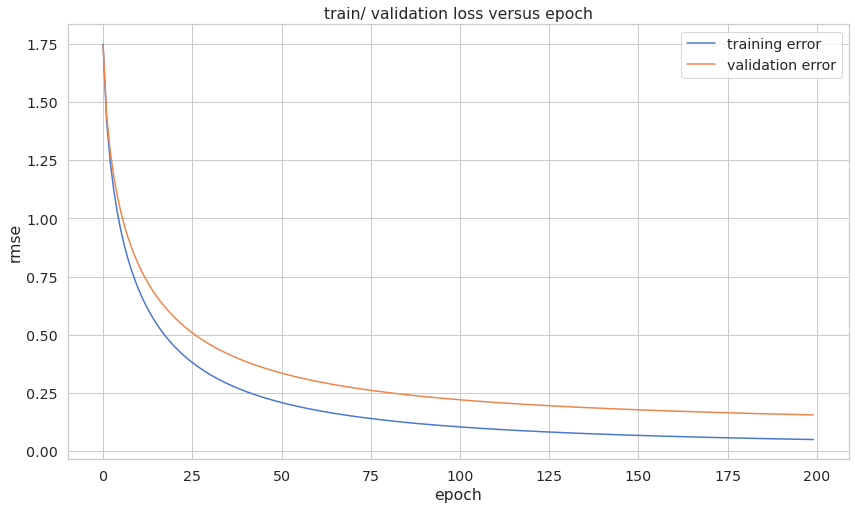

In [31]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

plt.plot(recommender.E_tr)
plt.plot(recommender.E_val)
plt.legend(['training error', 'validation error'])
plt.title('train/ validation loss versus epoch')
plt.xlabel('epoch')
plt.ylabel('rmse')

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

ANSER:
تعداد گام های بهینه سازی و تعداد متغیر های ثانویه برای مقایسه ثابت نگه داشته شده است.
با افزایش مقدار لامدا می توانیم رگولاریزاسیون بیشتری ایجاد کنیم و اختلاف خطای آموزش و تست را کاهش دهیم. همچنین با افزایش مقدار گام آموزش می توانیم همگرایی سریع تری به نقطه بهینه داشته باشیم.
علاوه بر این روش nestrov هم به الگوریتم بهینه سازی اضافه شده است. این کار هم باعث بهبود سرغت همگرایی و هم باعث کاهش بیشتر خطای آموزش و ارزیابی می شود

In [35]:
#creating recommender object
recommender2 = Recommender(n_epochs=200, n_latent_features=3, lmbda=0.5, learning_rate=0.005, nestrov = 0.8).fit(train, val)

Epoch 0: learning rate: 0.005, training error: 1.7546907526276405, validation error: 1.7699152143567896
Epoch 1: learning rate: 0.005, training error: 1.0157289983250624, validation error: 1.1084233504985144
Epoch 2: learning rate: 0.005, training error: 0.6016721058249594, validation error: 0.5988044701862951
Epoch 3: learning rate: 0.005, training error: 0.7701098485112227, validation error: 0.7536693524469813
Epoch 4: learning rate: 0.005, training error: 0.8318246683969391, validation error: 0.8683179562528734
Epoch 5: learning rate: 0.005, training error: 0.6720080974683605, validation error: 0.7699198062463992
Epoch 6: learning rate: 0.005, training error: 0.5471122658147575, validation error: 0.6633272553198457
Epoch 7: learning rate: 0.005, training error: 0.45618017201053557, validation error: 0.5624681312077396
Epoch 8: learning rate: 0.005, training error: 0.3839468599202156, validation error: 0.4723089235311306
Epoch 9: learning rate: 0.005, training error: 0.33078953935251

Text(0, 0.5, 'rmse')

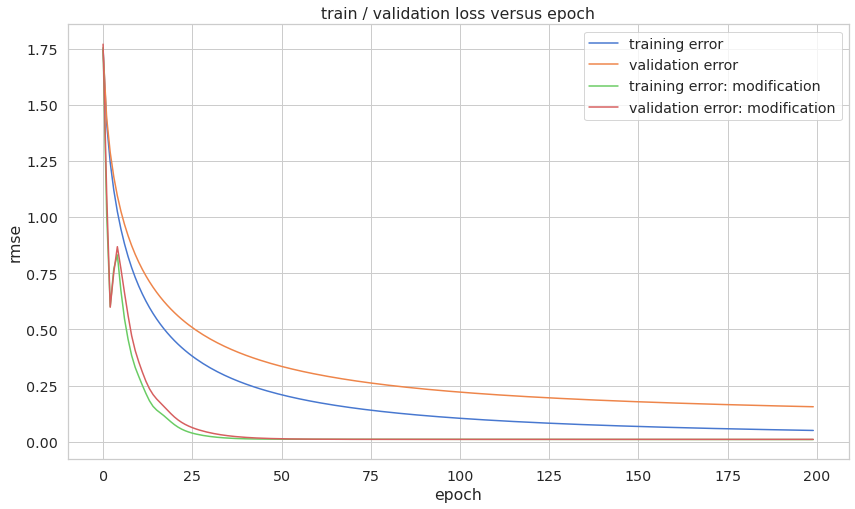

In [36]:
plt.plot(recommender.E_tr)
plt.plot(recommender.E_val)
plt.plot(recommender2.E_tr)
plt.plot(recommender2.E_val)
plt.legend(['training error', 'validation error', 'training error: modification', 'validation error: modification'])
plt.title('train / validation loss versus epoch')
plt.xlabel('epoch')
plt.ylabel('rmse')

# Making recommendations

In [42]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [43]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [44]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,472,3 Doors Down,0.196486
1,614,Pearl Jam,0.052734
2,978,Disturbed,0.042016
3,1118,A Perfect Circle,0.029742
4,1131,Tool,0.025657
5,2172,Gojira,0.021690
6,2474,Insane Clown Posse,0.021562
7,2479,Twiztid,0.016280
8,6257,Rob Zombie,0.010990
9,6618,D12,0.010627


In [45]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,4867,Thaeme Mariôto,0.318540
1,9566,土屋アンナ,0.313682
2,10002,Hildur Guðnadóttir,0.293904
3,11655,Dexter Gordon,0.286351
4,12464,Nanae Yoshimura,0.284335
5,12649,Chris Duarte & Bluestone co.,0.282316
6,12950,Delirious?,0.279137
7,13879,Chumbawamba,0.271409
8,15395,Shoshana Bean,0.263940
9,17650,Michelle Pfeiffer,0.263018


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**